### Importing libraries and our data

In [39]:
import pandas as pd
import matplotlib
import numpy as np

#importing libraries visualization
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
#statisctis library:
import scipy.stats as stats

In [2]:
data = pd.read_csv("/Users/yusuf/Downloads/bad-drivers.csv")
print(data.info())
df = data.copy()
df.columns =["state","total","speeding","alcohol","not_distracted","no_previous_accident","ins_premiums","ins_losses"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column                                                                                                  Non-Null Count  Dtype  
---  ------                                                                                                  --------------  -----  
 0   State                                                                                                   51 non-null     object 
 1   Number of drivers involved in fatal collisions per billion miles                                        51 non-null     float64
 2   Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding                                    51 non-null     int64  
 3   Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired                            51 non-null     int64  
 4   Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted                     

#### Exploration of Data

In [4]:
df.head()
df.describe()

,total,speeding,alcohol,not_distracted,no_previous_accident,ins_premiums,ins_losses
count,51.000000,51.000000,51.000000,51.000000,51.00000,51.000000,51.000000
mean,15.790196,31.725490,30.686275,85.921569,88.72549,886.957647,134.493137
std,4.122002,9.633438,5.132213,15.158949,6.96011,178.296285,24.835922
min,5.900000,13.000000,16.000000,10.000000,76.00000,641.960000,82.750000
25%,12.750000,23.000000,28.000000,83.000000,83.50000,768.430000,114.645000
50%,15.600000,34.000000,30.000000,88.000000,88.00000,858.970000,136.050000
75%,18.500000,38.000000,33.000000,95.000000,95.00000,1007.945000,151.870000
max,23.900000,54.000000,44.000000,100.000000,100.00000,1301.520000,194.780000


In [5]:
df.columns =["state","total","speeding","alcohol","not_distracted","no_previous_accident","ins_premiums","ins_losses"]
df.head()

,state,total,speeding,alcohol,not_distracted,no_previous_accident,ins_premiums,ins_losses
0,Alabama,18.8,39,30,96,80,784.55,145.08
1,Alaska,18.1,41,25,90,94,1053.48,133.93
2,Arizona,18.6,35,28,84,96,899.47,110.35
3,Arkansas,22.4,18,26,94,95,827.34,142.39
4,California,12.0,35,28,91,89,878.41,165.63


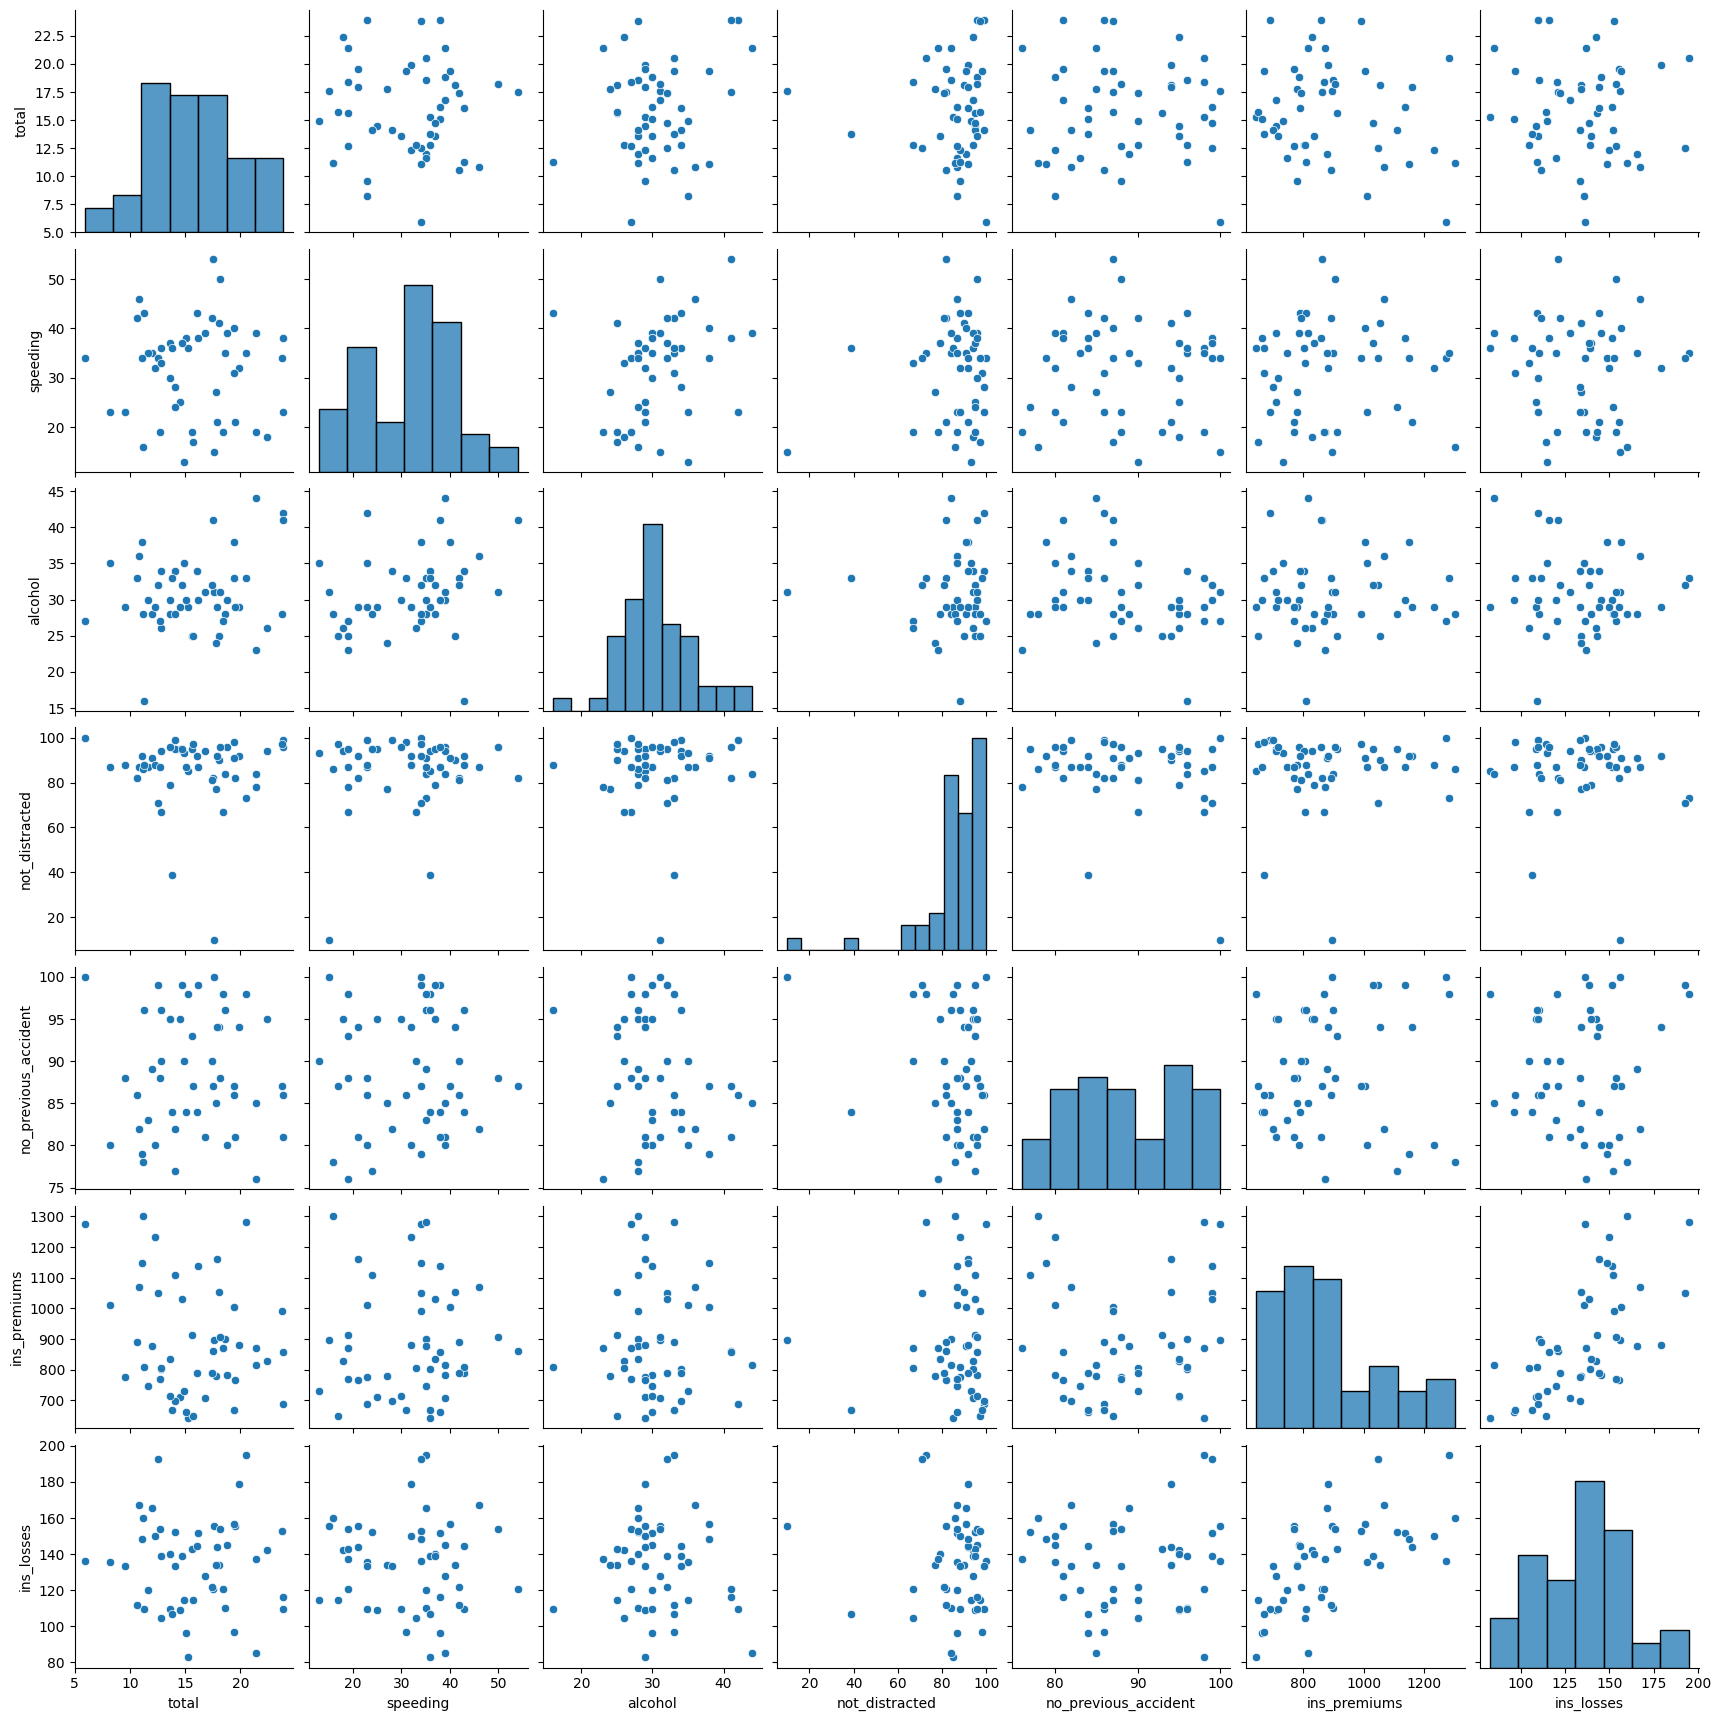

In [7]:
sns.pairplot(df)

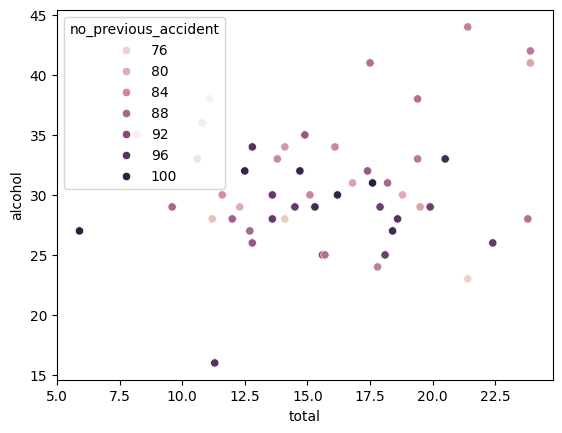

In [8]:
sns.scatterplot(x="total",hue="no_previous_accident",y="alcohol",data=df);

#### Statistical exploration and preparing the data

In [9]:
numericDf = df.select_dtypes(np.number)
numericDf

,total,speeding,alcohol,not_distracted,no_previous_accident,ins_premiums,ins_losses
0,18.8,39,30,96,80,784.55,145.08
1,18.1,41,25,90,94,1053.48,133.93
2,18.6,35,28,84,96,899.47,110.35
3,22.4,18,26,94,95,827.34,142.39
4,12.0,35,28,91,89,878.41,165.63
5,13.6,37,28,79,95,835.50,139.91
6,10.8,46,36,87,82,1068.73,167.02
7,16.2,38,30,87,99,1137.87,151.48
8,5.9,34,27,100,100,1273.89,136.05
9,17.9,21,29,92,94,1160.13,144.18


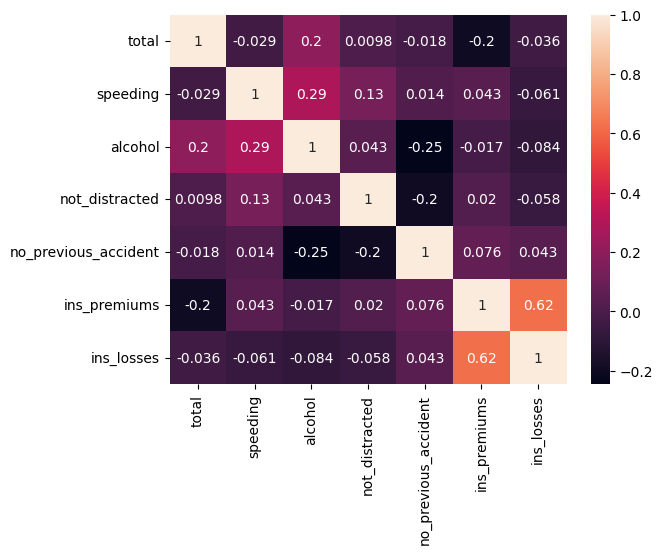

In [10]:
sns.heatmap(numericDf.corr(),annot=True);
#betweem ins_premiums and ins_losses correlations seems considerable(0.62)!

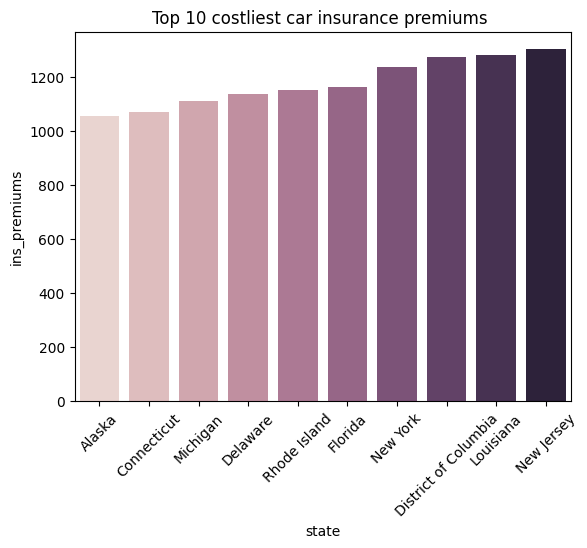

In [11]:
#Plotting a bar plot of the top 10 states with highest losses incurred by insurance companies

sorted_df1 = df.sort_values(by="ins_premiums")
sorted_df1["ins_premiums"].tail(10)

%matplotlib inline
plt.figure()
sns.barplot(
   x = sorted_df1["state"].tail(10),
   y = sorted_df1["ins_premiums"].tail(10),
   data = df,
   palette = sns.cubehelix_palette(len(sorted_df1["state"].tail(10))),
   hue = sorted_df1["state"].tail(10)
)

plt.title("Top 10 costliest car insurance premiums ")
plt.xticks(rotation=45)
plt.show()

#costiest car ins. means there are more "bad" drivers or fatal crashes.



In [12]:
sorted_df1["ins_premiums"].mean()

886.9576470588233

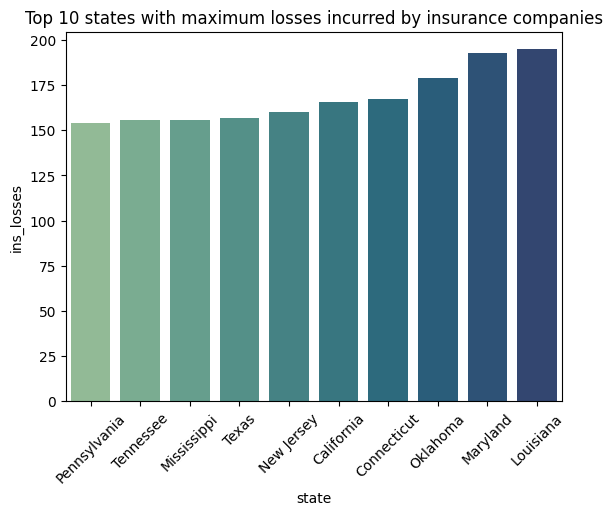

In [13]:
#Plotting a bar plot of the top 10 states with highest losses incurred by insurance companies
sorted_df2 = df.sort_values(by="ins_losses")
sorted_df2.tail(10)

plt.figure()
sns.barplot(
 x = sorted_df2["state"].tail(10),
 y = sorted_df2["ins_losses"].tail(10),
 data = df,
 palette = sns.color_palette("crest",(len(sorted_df2["state"].tail(10)))),
 hue = sorted_df2["state"].tail(10)
    
)

plt.title("Top 10 states with maximum losses incurred by insurance companies")
plt.xticks(rotation=45)
plt.show()



In [14]:
sorted_df2["ins_losses"].mean()


134.49313725490194

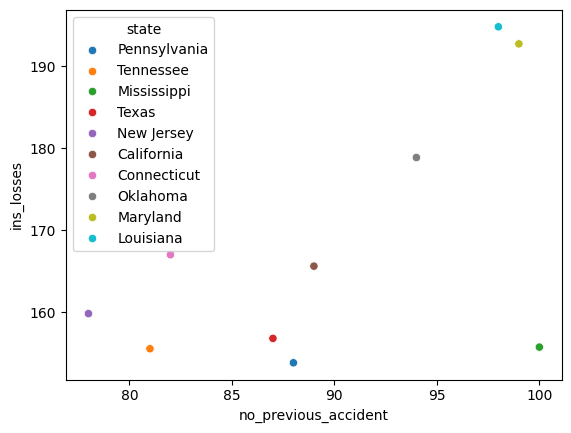

In [15]:
ax = sns.scatterplot(x=sorted_df2["no_previous_accident"].tail(10),y=sorted_df2["ins_losses"].tail(10),data=df,hue=sorted_df2["state"].tail(10));
#Top 10 states with max. losses incurred to company varies b/w parameters loss to company and not involving previous accident

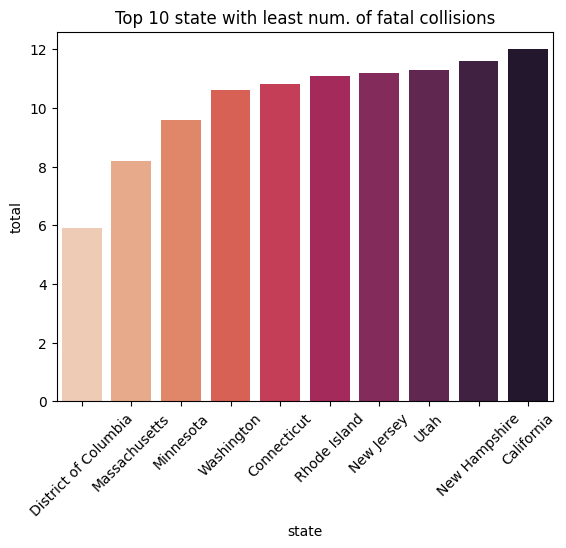

In [16]:
sorted_df3 = df.sort_values(by = "total").head(10) # --> GIVES top10 state with least num of fatal collisions per billion miles
plt.figure()
sns.barplot(
  x= sorted_df3["state"] ,
  y= sorted_df3["total"] ,
  data = sorted_df3 ,
  hue =  sorted_df3["state"] ,
  palette = sns.color_palette("rocket_r" , len(sorted_df3["state"].tail(10)))
)
plt.xticks(rotation = 45)
plt.title("Top 10 state with least num. of fatal collisions")
plt.show()

Even though fatal crashes seem to happen less on the states like NJ,Conneticut and California. I observed that these states are in the top 10 list where insurance companies have incurred maximum losses.This implies that looking at the total fatal crashes isn't a true measure for the losses incurred.For example, in a place where there are fewer accidents, maybe the damage suffered is more than the losses of the accident.

**Let's do a test of this comment above:**

H0 : M1  = M2 

H1 : M1 != M2 

(M1 = total,M2 = losses)

In [21]:
stats.shapiro(df["total"]) # pvalue bigger than 0.05 so : H0 cannot be rejected! , normally distributed

ShapiroResult(statistic=0.9867447390482901, pvalue=0.8353953363153828)

In [24]:
stats.shapiro(df['ins_losses']) # pvalue bigger than 0.05 so : H0 cannot be rejected! , normally distributed

ShapiroResult(statistic=0.9807946798101093, pvalue=0.5730013014081453)

In [40]:
stats.f_oneway(df["total"],df["ins_losses"]) # pvalue smaller than 0.05 so :H0 CAN BE rejected.
#meaning that: there's no MEANINGFUL correlation between these two values.We made the correct comment than.

F_onewayResult(statistic=1133.7866621548435, pvalue=2.2742091897170215e-56)

#### Correlation:

0.6466968325791855

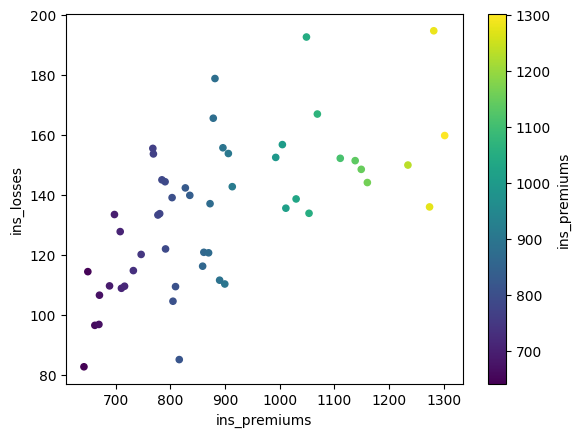

In [41]:
#NOW CORRELATION ANALYSIS:
#as we saw from the heatmap above, ins_losses and in_premiums has an correlation on 0.62 levels.Let's test that statistically!
df.plot.scatter(x="ins_premiums",y="ins_losses",c="ins_premiums");
#it seems that while premiums increasing,losses increases too.let's test.
df["ins_premiums"].corr(df["ins_losses"], method = "spearman")


In [47]:
shapiro(df["ins_losses"]) #pvalue 0.05'den büyük yani h0 cannot be rejected.

ShapiroResult(statistic=0.9807946798101093, pvalue=0.5730013014081453)

In [28]:
shapiro(df["ins_premiums"])# pvalue smaller than 0.05 so :H0 CAN BE rejected.not normally distributed.

ShapiroResult(statistic=0.9248806750204073, pvalue=0.0031854989986044033)

In [43]:
stats.levene(df["ins_losses"],df["ins_premiums"]) 
# NOT a homogeneous variance! HAVE TO do nonparametric!

LeveneResult(statistic=54.90758840069377, pvalue=4.120956168899045e-11)

In [44]:
#nonparametric correlation test :
from scipy.stats import spearmanr
spearmanr(df["ins_premiums"],df["ins_losses"]) #HO can be rejected!. so : 
# H0-which says : there's no meaningful relationship between premiums and losses REJECTED.This means there's an relationship and this relationship is positive directional moderate/upper severe


SignificanceResult(statistic=0.6466968325791855, pvalue=2.947256819445241e-07)

#### Hypothesis:

In [45]:
#Here i want to do a test for the above graphics that occured to imply that 3 state's drivers worse than others
#firstly data preparition
#I'll make use of the above correlation test that says 0.64 for losses and premiums.


connecticut = df.loc[df["state"] == "Connecticut", ["ins_premiums", "ins_losses"]]
newjersey = df.loc[df["state"] == "New Jersey", ["ins_premiums", "ins_losses"]]
louisiana = df.loc[df["state"] == "Louisiana", ["ins_premiums", "ins_losses"]]

combined_df = pd.concat([connecticut, newjersey, louisiana], axis=0)
combined_df.index = ['Connecticut', 'New Jersey', 'Louisiana']
combined_df

,ins_premiums,ins_losses
Connecticut,1068.73,167.02
New Jersey,1301.52,159.85
Louisiana,1281.55,194.78


In [33]:
other_df = df[["ins_premiums","ins_losses"]]
other_df.index = df["state"]

#removing 3 state's data from the others to compare
other_df2 = other_df.drop(["Connecticut","New Jersey","Louisiana"])
other_df2

,ins_premiums,ins_losses
state,,
Alabama,784.55,145.08
Alaska,1053.48,133.93
Arizona,899.47,110.35
Arkansas,827.34,142.39
California,878.41,165.63
Colorado,835.50,139.91
Delaware,1137.87,151.48
District of Columbia,1273.89,136.05
Florida,1160.13,144.18


In [34]:
stats.shapiro(combined_df) # pvalue bigger than 0.05 so : H0 cannot be rejected! , normally distributed

ShapiroResult(statistic=0.75796738366126, pvalue=0.02381166735973966)

In [48]:
stats.shapiro(other_df2) #0.05'den kücük,H0 CAN be rejected,not normally distributed! So we have to do nonparametric!

ShapiroResult(statistic=0.814737909540594, pvalue=1.246085775183433e-09)

In [49]:
#there's no need to do levene because we couldnt even pass the normally distribution tests but i just wanted to do so BUT it doesnt effect anything! 
# stats.levene(combined_df,other_df2) 

In [50]:
# nonparametric ind 2 t-test : 
stats.mannwhitneyu(combined_df,other_df2) 
#pvalue is smaller than 0.05 so H0 CAN BE rejected.
#Meaning that there's difference between 3 state's drivers and the others and this difference seems to tell us those in the 3 state's are worse driver than others!

MannwhitneyuResult(statistic=array([138., 139.]), pvalue=array([0.00220888, 0.00153661]))